In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.interpolate import interp1d
from functools import cache
from IPython import display

import matplotlib

%matplotlib inline

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (14,9)
matplotlib.rcParams['savefig.bbox'] = 'tight'

import multi_distr
from wish_distr import e5s_pdf, e4s_pdf, w5s_pdf, w4s_pdf
import markov

In [2]:
e5s_mult = multi_distr.MultiDistr(e5s_pdf, n_max=90)
e4s_mult = multi_distr.MultiDistr(e4s_pdf, n_max=10)
w5s_mult = multi_distr.MultiDistr(w5s_pdf, n_max=75)
w4s_mult = multi_distr.MultiDistr(w4s_pdf, n_max=9)

In [15]:
def summ1(distr):
    peak = np.argmax(distr)
    perc90 = np.argmax(np.cumsum(distr) > .9)
    perc99 = np.argmax(np.cumsum(distr) > .99)
    
    return peak, perc90, perc99

print( summ1(e5s_mult(np.arange(91))) )
print( summ1(e4s_mult(np.arange(11))) )
print( summ1(w5s_mult(np.arange(76))) )
print( summ1(w4s_mult(np.arange(10))) )

(77, 80, 83)
(9, 10, 10)
(66, 68, 71)
(8, 9, 9)


In [21]:
def summ2(distr):
    return f'{distr.mean:.4f}$n$ & {distr.std:.4f}$\sqrt{{n}}$'
    

print(summ2(e5s_mult))
print(summ2(e4s_mult))
print(summ2(w5s_mult))
print(summ2(w4s_mult))

62.3385$n$ & 24.3405$\sqrt{n}$
7.6526$n$ & 2.8371$\sqrt{n}$
53.1251$n$ & 20.6283$\sqrt{n}$
6.7233$n$ & 2.5137$\sqrt{n}$


In [22]:
e5s_mkv = [[0,0,0],[1/2,0,0],[1/2,1,1]]
e4s_mkv = [[1/3,2/3,0],[1/2,0,0],[1/6,1/3,1]]
w5s_mkv = [[3/8,1/2,0],[1/4,0,0],[3/8,1/2,1]]
w4s_mkv = [[3/5,4/5,0],[1/4,0,0],[3/20,1/5,1]]

e5s_hitter = markov.distr_hitter(markov.MarkovSolver(e5s_mkv), e5s_mult)
e5s_targ_mult = multi_distr.MultiDistr(e5s_hitter, 180)

PATHOLOGICAL MARKOV CHAIN


In [28]:
infinity = 500
e4s_targ_mult = multi_distr.DupeTargMulti(markov.MarkovSolver(e4s_mkv), e4s_mult, infinity)
print('e4s done')
w4s_targ_mult = multi_distr.DupeTargMulti(markov.MarkovSolver(w4s_mkv), w4s_mult, infinity)
print('w4s done')

e4s done
w4s done


In [29]:
w5s_targ_mult = multi_distr.DupeTargMulti(markov.MarkovSolver(w5s_mkv), w5s_mult, 2000)

In [57]:
def summ3(distr, inf=500):
    x = np.arange(inf)
    cs = np.cumsum(distr(x, 1))
    mu = round(np.sum(1 - cs))

    perc50 = np.argmax(cs > .5)
    perc80 = np.argmax(cs > .8)
    return mu, cs[mu], perc50, perc80

print(summ3(e4s_targ_mult))
print(summ3(w4s_targ_mult))
print(summ3(e5s_targ_mult, 1000))
print(summ3(w5s_targ_mult, 1000))

(34, 0.6290350583925449, 26, 52)
(42, 0.6372011529920517, 30, 66)
(94, 0.6102268977980926, 80, 151)
(133, 0.6390456139687744, 104, 198)


In [58]:
def summ4(distr, n, inf=500):
    x = np.arange(inf)
    cs = np.cumsum(distr(x, n))
    mu = round(np.sum(1-cs))
    
    perc50 = np.argmax(cs > .5)
    perc80 = np.argmax(cs > .8)
    return mu, cs[mu], perc50, perc80

In [72]:
print(summ4(e5s_targ_mult, 2))
print(summ4(w4s_targ_mult, 5))
print(summ4(e4s_targ_mult, 7))
print(summ4(e5s_targ_mult, 7, inf=1000))

(187, 0.5196953667403115, 183, 236)
(210, 0.5613723121317911, 197, 276)
(241, 0.5522387935670549, 231, 302)
(655, 0.5044661162845425, 654, 752)


In [75]:
summ4(w5s_targ_mult, 5, inf=2200)

(664, 0.5582699007377748, 631, 844)

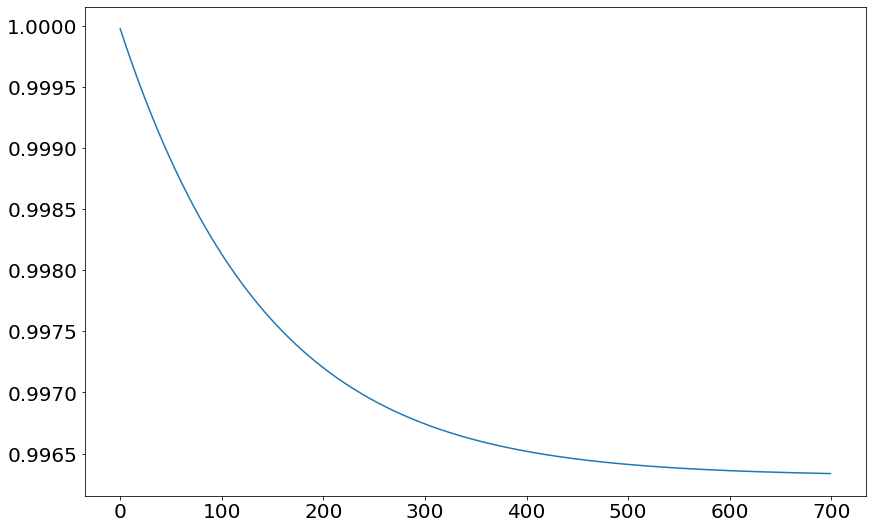

In [86]:
plt.plot(1 - np.cumsum(w5s_targ_mult(np.arange(1500, 2200), 5)))

In [90]:
np.cumsum(w5s_targ_mult(np.arange(1, 2200), 5))

array([-2.16840434e-19,  1.30104261e-18,  3.52365706e-18, ...,
        1.00035501e+00,  1.00035517e+00,  1.00035533e+00])